In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Alameda County Jury Panels ##

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


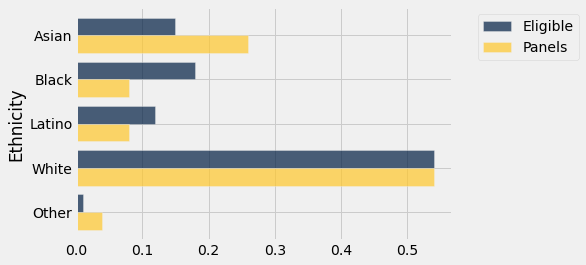

In [3]:
jury.barh('Ethnicity')

In [4]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)
# model demonstrates our true alameda county
# ethnicity proportions
# of eligible residents to be on our jury panel
# 15% - asian
# 18% - black
# 12% - latino
# 54% - white
# 1% - other

In [5]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated
# in my simulated jury panel
# i have 16% asian
# 18% black
# 10.5% latino
# 53% white
# 1% other

array([0.16654954, 0.18271258, 0.1054111 , 0.53338018, 0.01194659])

In [6]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.16655
Black,0.18,0.08,0.182713
Latino,0.12,0.08,0.105411
White,0.54,0.54,0.53338
Other,0.01,0.04,0.0119466


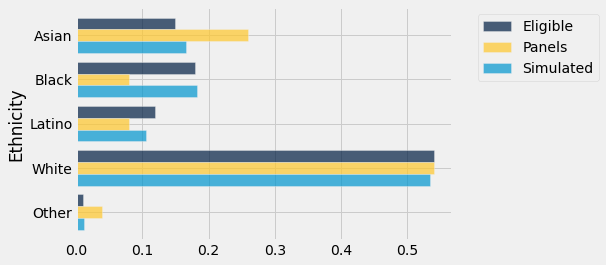

In [7]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [8]:
# In the last lecture, the difference between observed black/purple
# and their expected values (25%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [9]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [10]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [11]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))
# total variation distance from our simulated jury panels
# and the eligible population
# based on ethnicities

0.023499648629655614

In [12]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


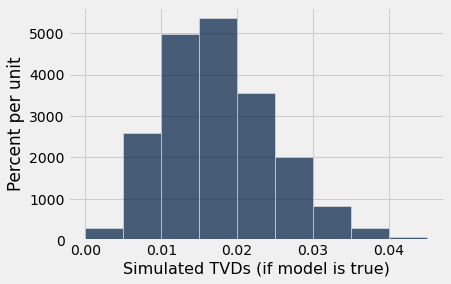

In [13]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))